# EDA

# Importar librerías

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt #Importa la biblioteca matplot
import seaborn as sns # Importa la biblioteca seaborn

# Normalización de texto
import unicodedata 

# Imputación de datos faltantes
from sklearn.impute import KNNImputer

# Utilizamos el set_option para ver todas las columnas del fichero
pd.set_option('display.max_columns', None)

In [3]:
# Cargamos datos y leemos las primeras 5 filas
df_raw= pd.read_csv('../data/raw/dataset_estudiantes.csv', sep=',')
df_raw.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


# Análisis Exploratorio

In [4]:
print(f"El número de filas es {df_raw.shape[0]}, y el número de columnas es {df_raw.shape[1]}")

El número de filas es 1000, y el número de columnas es 11


In [5]:
# Informacion general
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   horas_estudio_semanal      1000 non-null   float64
 1   nota_anterior              1000 non-null   float64
 2   tasa_asistencia            1000 non-null   float64
 3   horas_sueno                850 non-null    float64
 4   edad                       1000 non-null   int64  
 5   nivel_dificultad           1000 non-null   object 
 6   tiene_tutor                1000 non-null   object 
 7   horario_estudio_preferido  900 non-null    object 
 8   estilo_aprendizaje         950 non-null    object 
 9   nota_final                 1000 non-null   float64
 10  aprobado                   1000 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 86.1+ KB


In [6]:
# Hacemos una copia para empezar a trabajar con el DataFrame
df =df_raw.copy()

In [7]:
# Redondeamos las variables de tipo float a 2 decimales y lo mostramos por pantalla
df = df.round(2)
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.96,48.83,86.64,6.68,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.04,80.83,83.45,4.62,18,Difícil,No,Tarde,NaN,72.0,1
2,4.51,90.38,74.62,7.76,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.65,81.88,82.85,8.59,23,Fácil,No,NaN,Visual,78.2,1
4,1.00,66.25,54.54,6.67,21,Medio,No,NaN,Auditivo,66.0,1


# Descripción de columnas
- <span style="color: #FFFF99;">horas_estudio_semanal</span>: Número de horas de estudio a la semana.
- <span style="color: #FFFF99;">nota_anterior</span>: Nota que obtuvo el alumno en la convocatoria anterior.
- <span style="color: #FFFF99;">tasa_asistencia</span>: Tasa de asistencia a clase en porcentaje.
- <span style="color: #FFFF99;">horas_sueno</span>: Promedio de horas que duerme el alumno al día.
- <span style="color: #FFFF99;">edad</span>: Edad del alumno.
- <span style="color: #FFFF99;">nivel_dificultad</span>: Dificultad del alumno para el estudio.
- <span style="color: #FFFF99;">tiene_tutor</span>: Indica si el alumno tiene tutor o no.
- <span style="color: #FFFF99;">horario_estudio_preferido</span>: Horario de estudio preferido por el alumno.
- <span style="color: #FFFF99;">estilo_aprendizaje</span>: Forma de estudio que emplea el alumno.

# Verificación de duplicados

In [8]:
# Verificación general
df.duplicated().sum()

np.int64(0)

# Verificación y manejo de nulos

In [9]:
# Hacemos un conteo de los nulos de cada variable
df.isna().sum()

horas_estudio_semanal          0
nota_anterior                  0
tasa_asistencia                0
horas_sueno                  150
edad                           0
nivel_dificultad               0
tiene_tutor                    0
horario_estudio_preferido    100
estilo_aprendizaje            50
nota_final                     0
aprobado                       0
dtype: int64

# Identificar variables categóricas y numéricas

In [10]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

print('Variables numéricas:\n\n', num_cols)
print('\nVariables categóricas:\n\n', cat_cols)

Variables numéricas:

 Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nota_final', 'aprobado'],
      dtype='object')

Variables categóricas:

 Index(['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje'],
      dtype='object')


In [11]:
# Controlamos nulos de los campos object 'horario_estudio_preferido' y 'estilo_aprendizaje' y lo modificamos poniendo 'Desconocido'
cols_nulos = ['horario_estudio_preferido', 'estilo_aprendizaje']
df[cols_nulos] = df[cols_nulos].fillna('Desconocido')

In [12]:
# Control de nulos del campo 'horas_sueno' utilizando el método KNNImputer

# 1. Guardamos en un df nuevo las variables númericas
df_num = df[num_cols]

# 2. Creamos el KNNImputer ajustando el número de vecinos a 5
imputer = KNNImputer(n_neighbors=5)

# 3. Aplicamos la imputación
df_numeric_KNNI = imputer.fit_transform(df_num)

# 4. Convertimos el resultado a DataFrame y reemplazamos en el original
df_numeric_KNNI = pd.DataFrame(df_numeric_KNNI, columns=num_cols)

# Sustituimos la columna imputada en el dataset original y redondeamos el resultado a 2
df['horas_sueno'] = df_numeric_KNNI['horas_sueno'].round(2)

# Mostramos resultado
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.96,48.83,86.64,6.68,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.04,80.83,83.45,4.62,18,Difícil,No,Tarde,Desconocido,72.0,1
2,4.51,90.38,74.62,7.76,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.65,81.88,82.85,8.59,23,Fácil,No,Desconocido,Visual,78.2,1
4,1.00,66.25,54.54,6.67,21,Medio,No,Desconocido,Auditivo,66.0,1


In [13]:
# Volvemos a hacer un conteo de los nulos de cada variable
df.isna().sum()

horas_estudio_semanal        0
nota_anterior                0
tasa_asistencia              0
horas_sueno                  0
edad                         0
nivel_dificultad             0
tiene_tutor                  0
horario_estudio_preferido    0
estilo_aprendizaje           0
nota_final                   0
aprobado                     0
dtype: int64

In [27]:
# Eliminamos tíldes, para que no nos afecte en procesos posteriores
# Creamos una pequeña función para quitar tildes
def quitar_tildes(texto):
    if isinstance(texto, str):
        return ''.join(
            c for c in unicodedata.normalize('NFD', texto)
            if unicodedata.category(c) != 'Mn'
        )
    return texto

# Lo actualizamos en la columna
df['nivel_dificultad'] = df['nivel_dificultad'].apply(quitar_tildes)
df['tiene_tutor'] = df['tiene_tutor'].apply(quitar_tildes)


# Variables numéricas

## Estadísticas descriptivas

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
horas_estudio_semanal,1000.0,10.07236,4.852185,1.0,6.6275,10.00,13.3725,25.0
nota_anterior,1000.0,69.88543,14.687718,30.0,59.8800,70.00,80.1200,100.0
tasa_asistencia,1000.0,73.99209,18.195871,20.0,61.5125,75.00,88.4875,100.0
horas_sueno,1000.0,7.01364,1.356049,4.0,6.1375,7.02,7.9000,10.0
edad,1000.0,23.53200,3.476933,18.0,21.0000,24.00,27.0000,29.0
nota_final,1000.0,71.44140,9.562078,30.0,64.7750,71.40,77.9000,100.0
aprobado,1000.0,0.89800,0.302800,0.0,1.0000,1.00,1.0000,1.0


## Visualizaciones

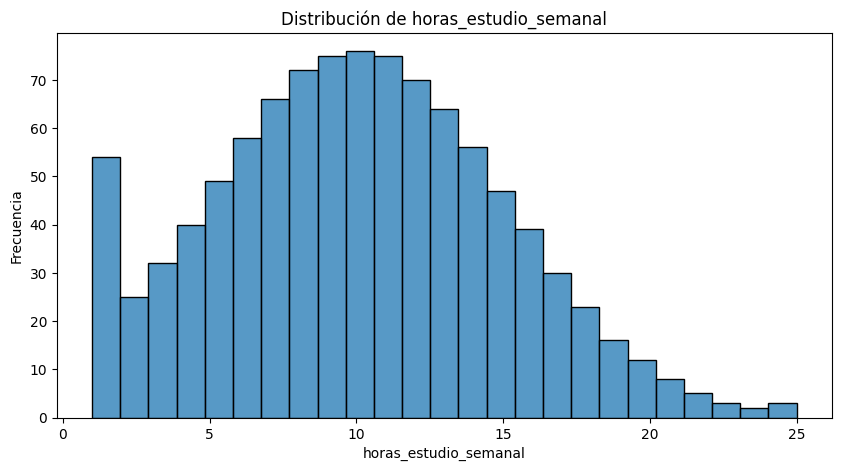

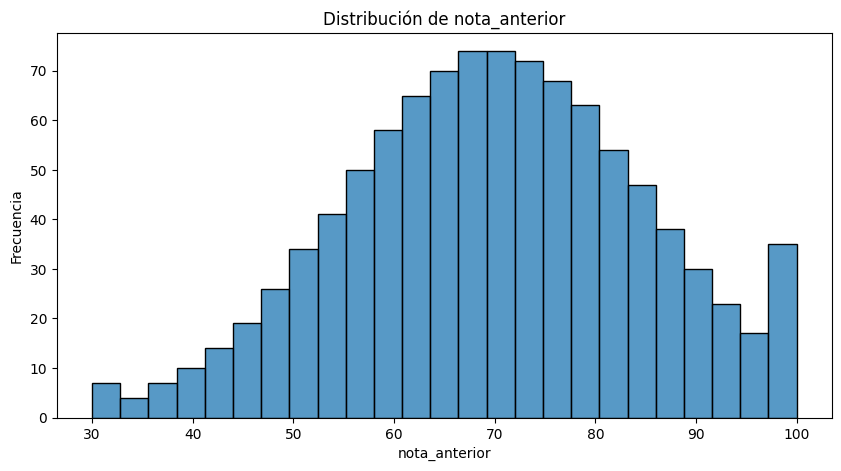

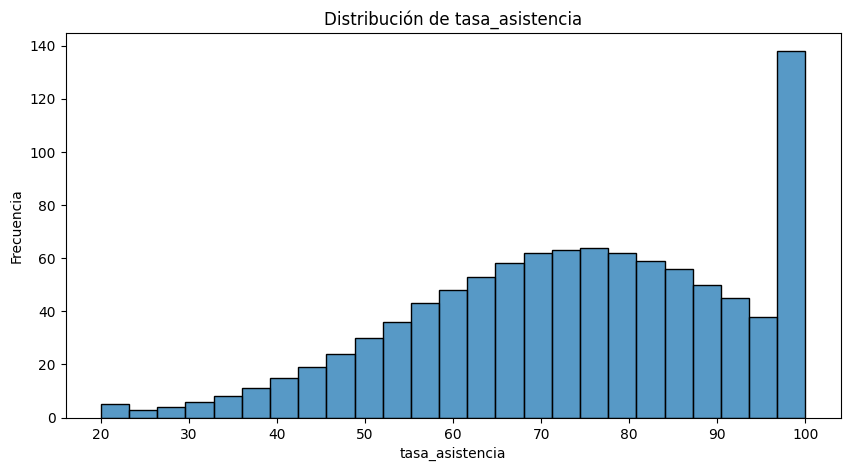

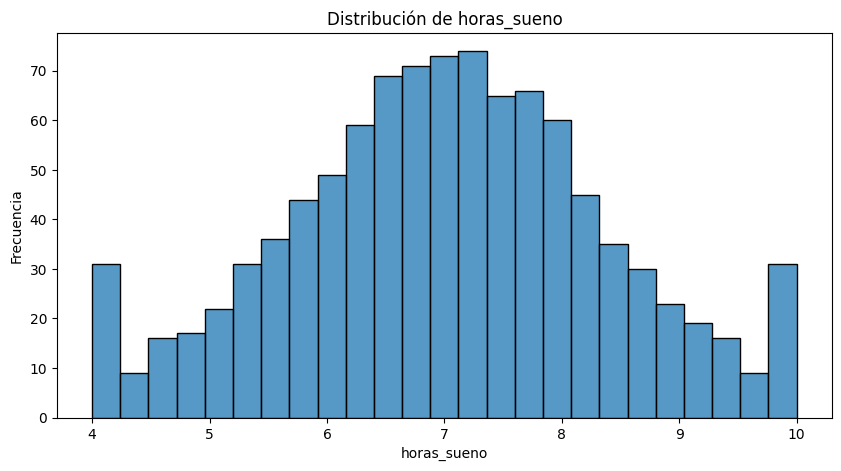

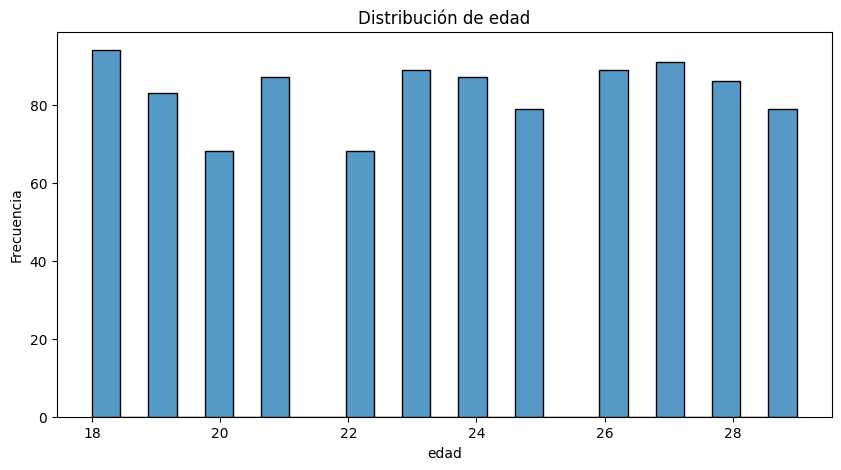

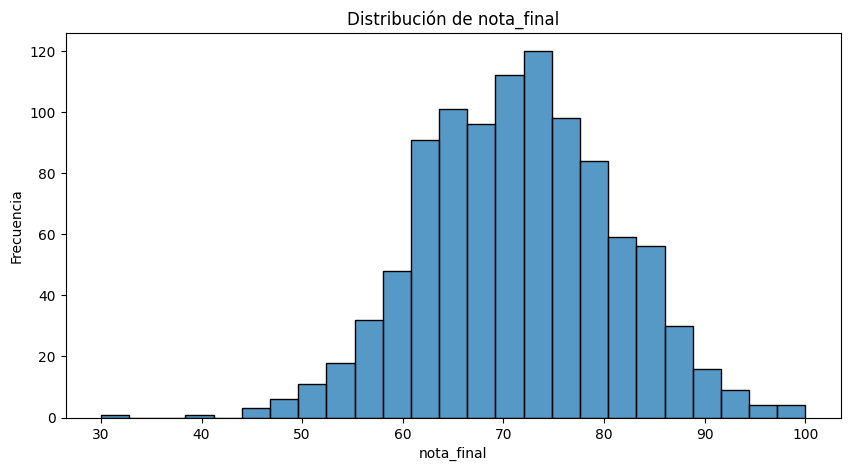

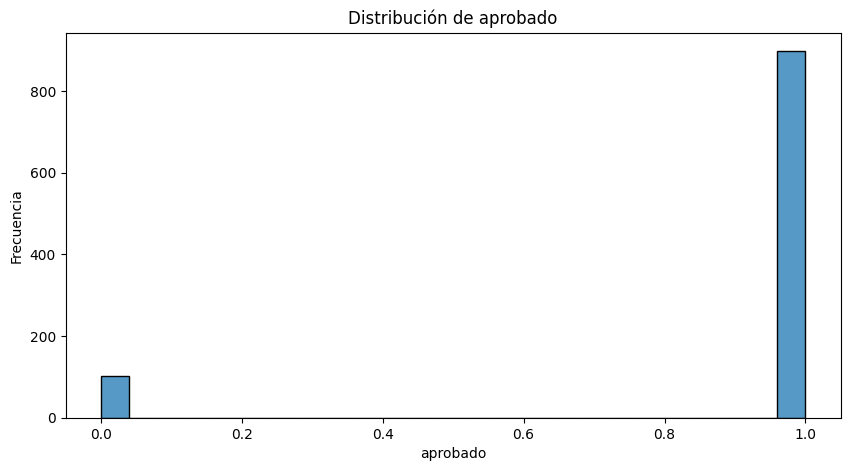

In [29]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=25, edgecolor='black')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

## Variables categóricas

## Estadísticas descriptivas

In [30]:
df.describe(include= 'object').T

,count,unique,top,freq
nivel_dificultad,1000,3,Medio,504
tiene_tutor,1000,2,No,597
horario_estudio_preferido,1000,4,Noche,344
estilo_aprendizaje,1000,5,Visual,363


## Valores únicos y frecuencias

In [31]:
for col in cat_cols:
    print(f"\n----------ESTAMOS ANALIZANDO LA COLUMNA: '{col}'----------\n")
    print(f'Valores únicos: {df[col].unique()}\n')
    print('Frecuencia de los valores únicos de las categorías:')
    display(df[col].value_counts())


----------ESTAMOS ANALIZANDO LA COLUMNA: 'nivel_dificultad'----------

Valores únicos: ['Facil' 'Dificil' 'Medio']

Frecuencia de los valores únicos de las categorías:


nivel_dificultad
Medio      504
Facil      313
Dificil    183
Name: count, dtype: int64


----------ESTAMOS ANALIZANDO LA COLUMNA: 'tiene_tutor'----------

Valores únicos: ['Si' 'No']

Frecuencia de los valores únicos de las categorías:


tiene_tutor
No    597
Si    403
Name: count, dtype: int64


----------ESTAMOS ANALIZANDO LA COLUMNA: 'horario_estudio_preferido'----------

Valores únicos: ['Tarde' 'Mañana' 'Desconocido' 'Noche']

Frecuencia de los valores únicos de las categorías:


horario_estudio_preferido
Noche          344
Tarde          337
Mañana         219
Desconocido    100
Name: count, dtype: int64


----------ESTAMOS ANALIZANDO LA COLUMNA: 'estilo_aprendizaje'----------

Valores únicos: ['Lectura/Escritura' 'Desconocido' 'Visual' 'Auditivo' 'Kinestésico']

Frecuencia de los valores únicos de las categorías:


estilo_aprendizaje
Visual               363
Auditivo             254
Kinestésico          178
Lectura/Escritura    155
Desconocido           50
Name: count, dtype: int64

## Visualizaciones

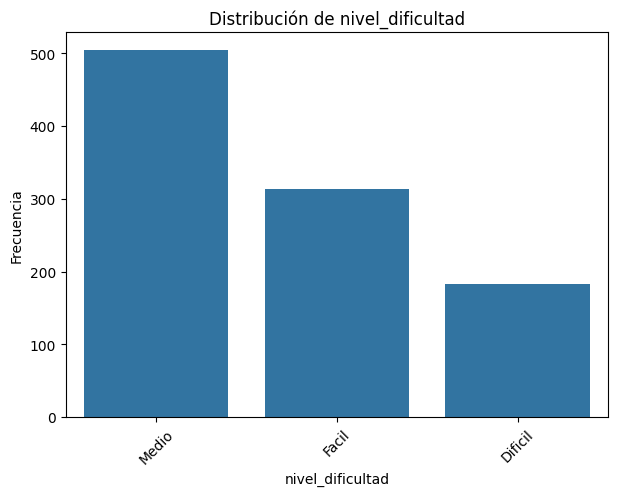

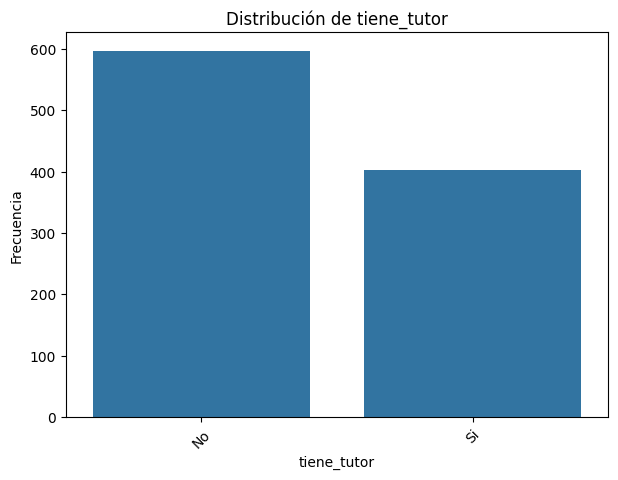

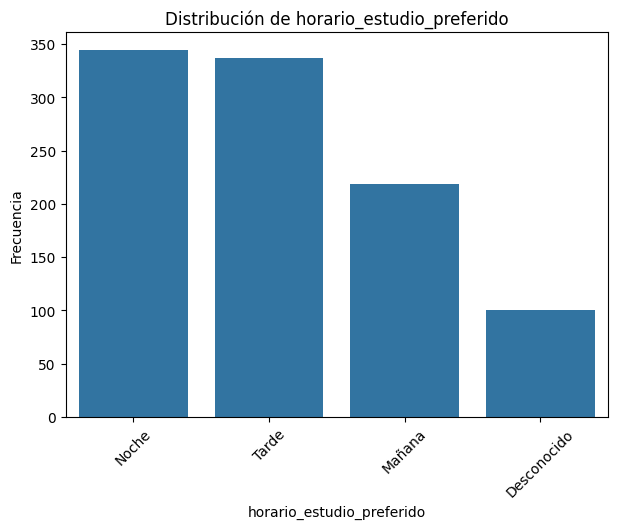

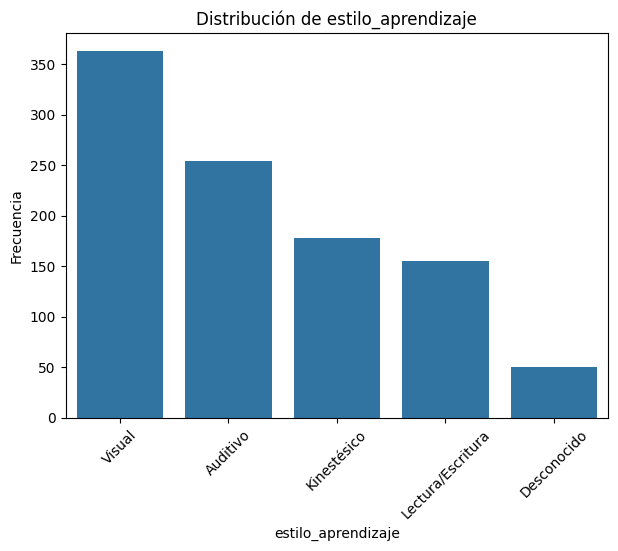

In [32]:
for col in cat_cols:
    num_categories = df[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5 # Altura fija

    plt.figure(figsize=(width,height))
    sns.countplot(x=df[col], order=df[col].value_counts().index)

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    plt.show()

# Matriz de correlación

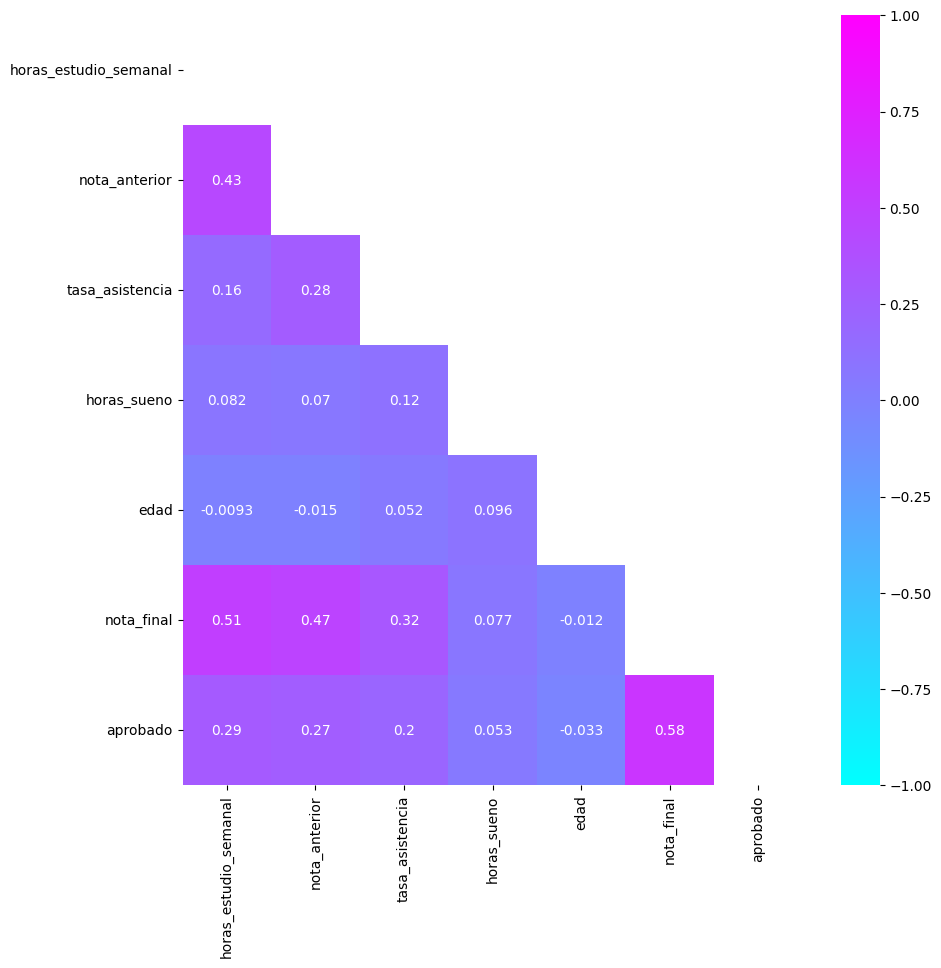

In [33]:
# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Crear la figura
plt.figure(figsize=(10,10))

# Crear la máscara para mostrar solo la parte triangular
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Graficar mapa de calor
sns.heatmap(corr_matrix,
            annot=True,
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='cool')

plt.show()

# Relaciones cruzadas

### 1. Variable objetivo <span style="color: #FFFF99;">nota_final</span>

##### Variables numéricas

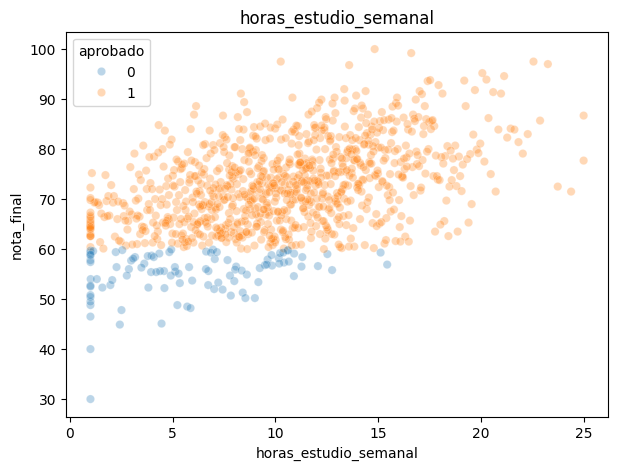

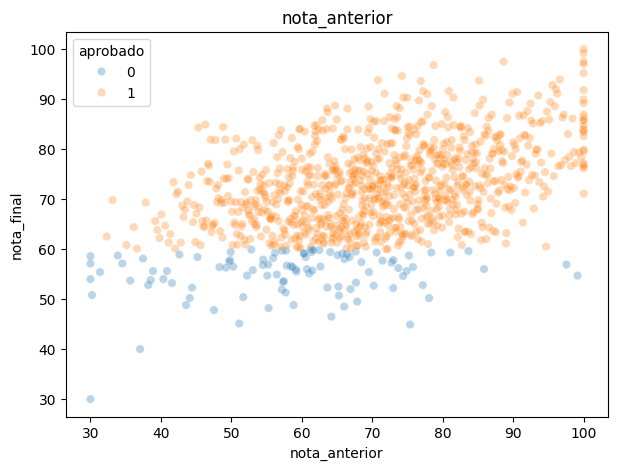

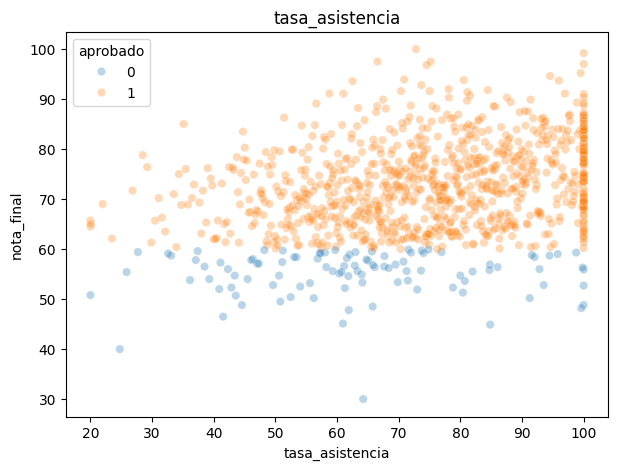

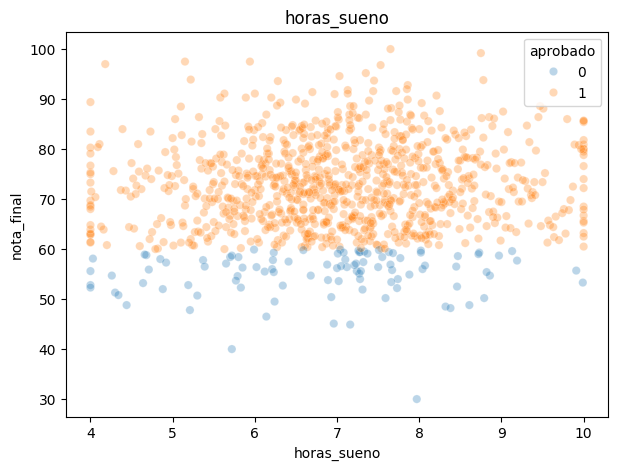

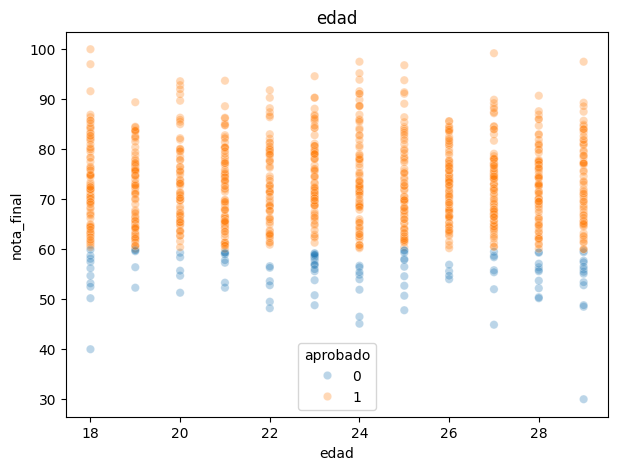

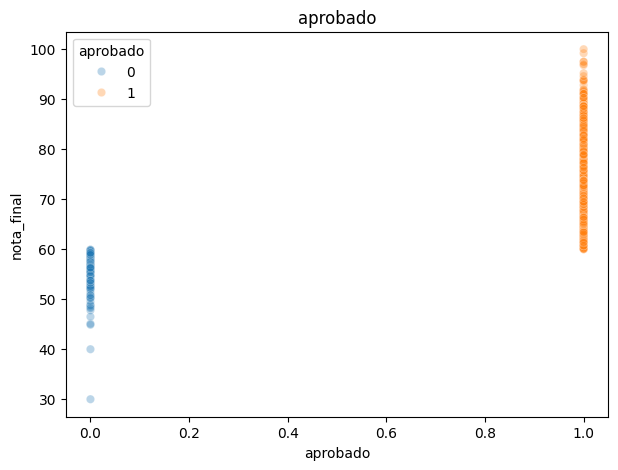

In [34]:
# Generamos un gráfico de dispersión con las variables numéricas
# Definir variable objetivo
tv='nota_final'

# Definir DataFrame y variables numéricas
df_num = df.select_dtypes(include=np.number).drop(columns=[tv], errors='ignore') # borramos la variable objetivo
cols_num = df_num.columns

# Generar gráfico de dispersión
for col in cols_num:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=df[col], y=df[tv], hue=df['aprobado'], alpha=0.3)
    #sns.scatterplot(x=df[col], y=df[tv])

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.show()

##### Variables Categóricas

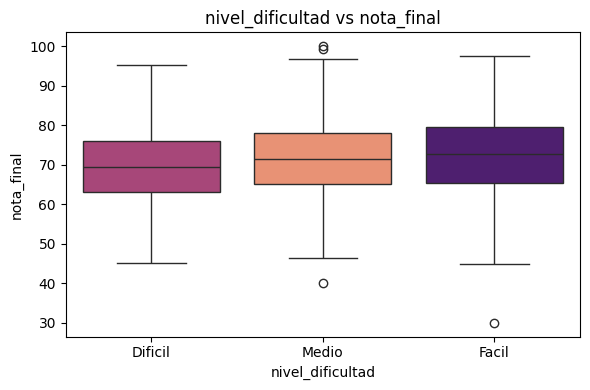

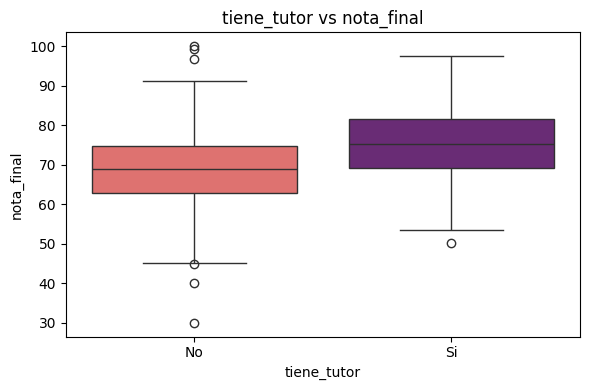

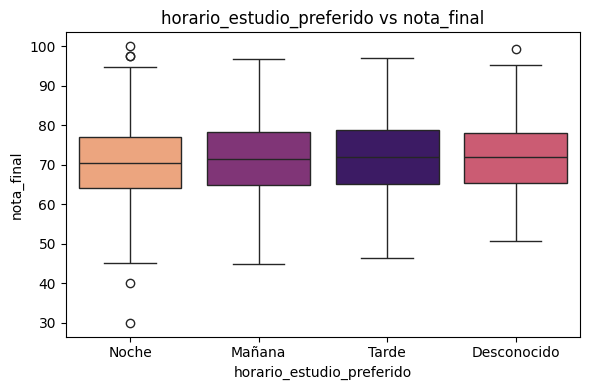

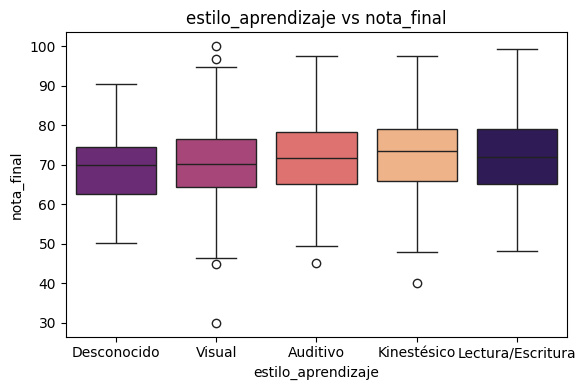

In [35]:
# Generamos gráficos de bigotes con las variables categóricas
# Definir variable objetivo
tv='nota_final'

# Generar variables independientes por cada variable categórica
for col in cat_cols:
    # Calcular el número de categorías únicas
    num_cats= df[col].nunique()

    # Ajustar dinámicamente el tamaño del gráfico
    fig_width = min(max(6, num_cats * 1,5), 25) # Ancho mínimo 6, máximo 25
    fig_height = 4

    # Ordenar las categorías por el promedio de la variable objetivo
    ordered_cats = df.groupby(col)[tv].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(x=df[col], y=df[tv], hue=df[col], data=df, order=ordered_cats, palette='magma', legend=False)

    plt.title(f'{col} vs {tv}')
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.tight_layout()
    plt.show()

### 2. Variable objetivo <span style="color: #FFFF99;">aprobado</span>

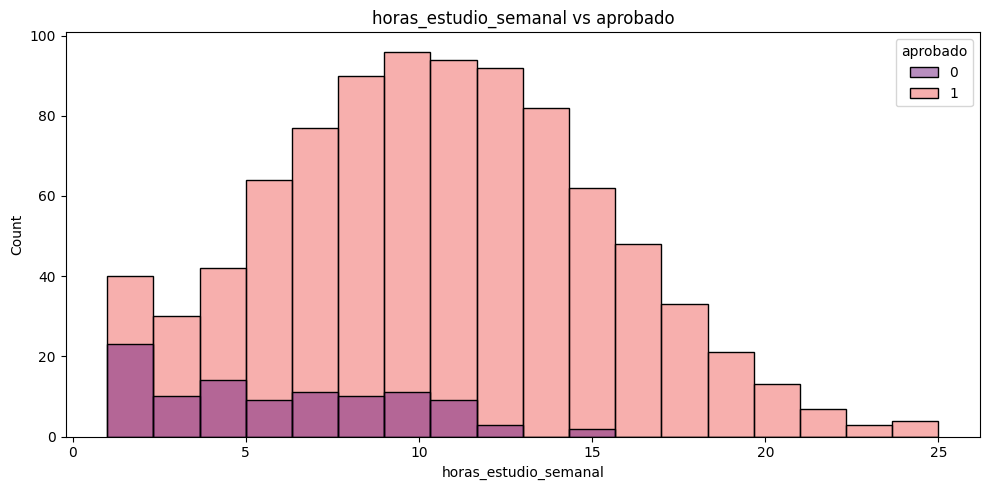

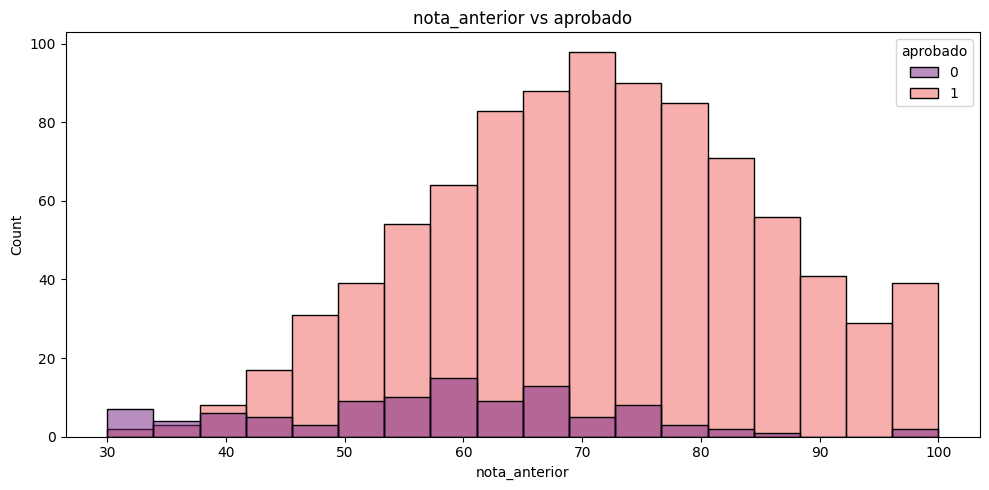

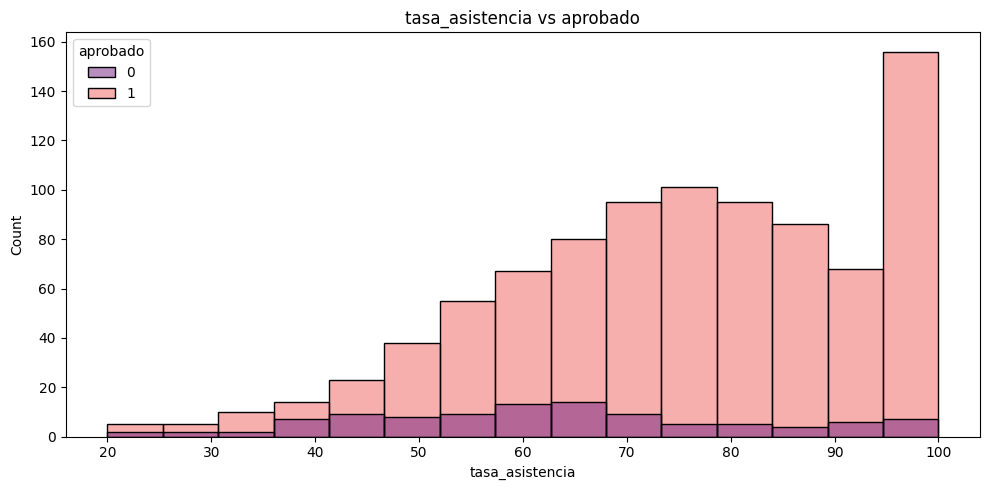

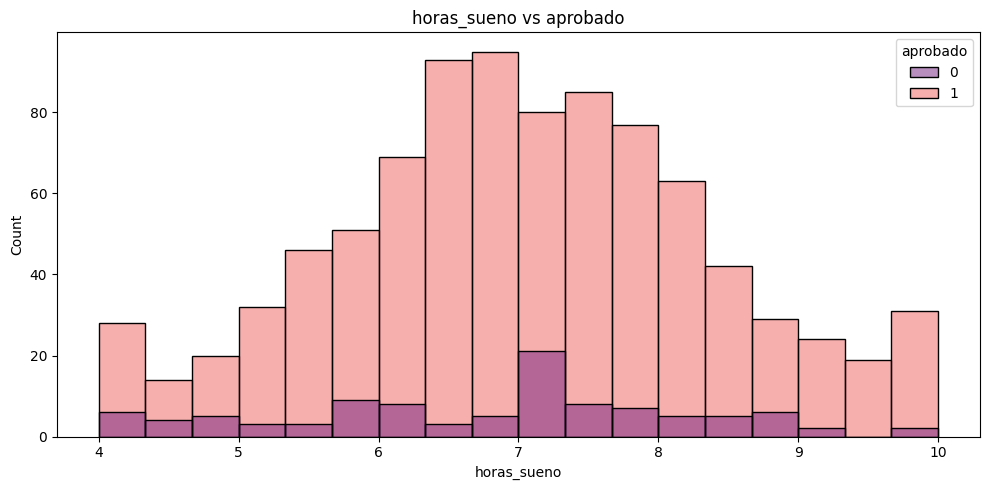

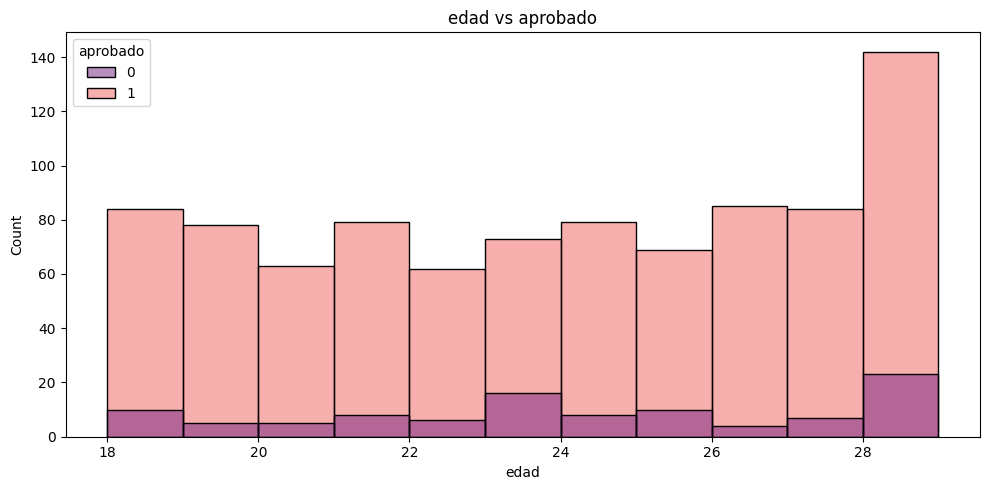

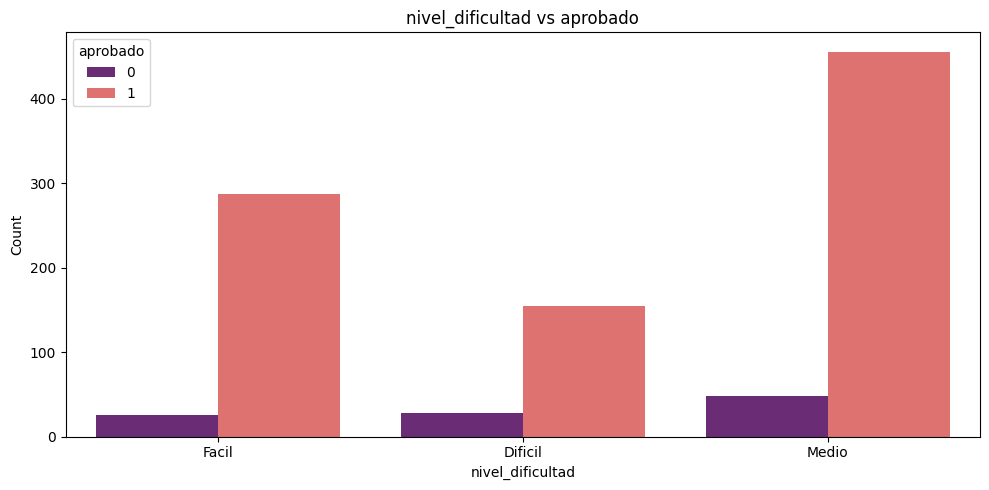

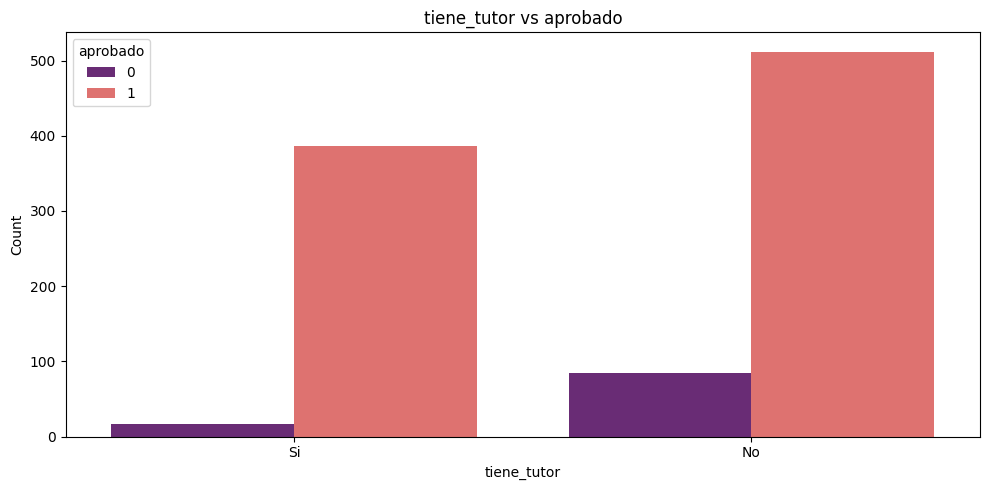

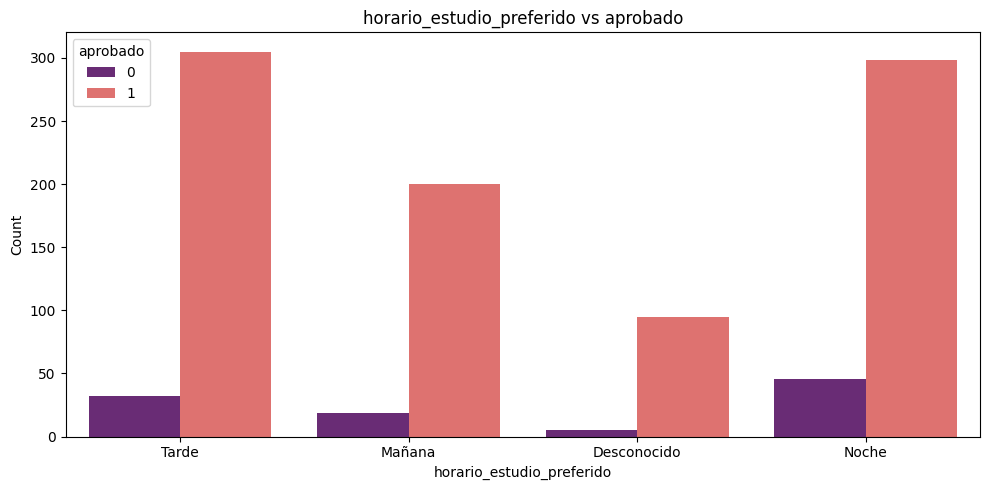

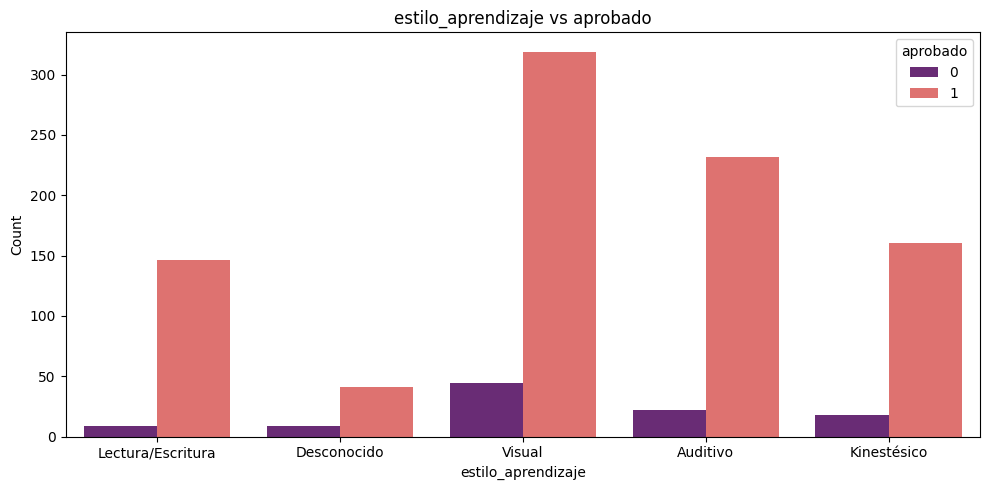

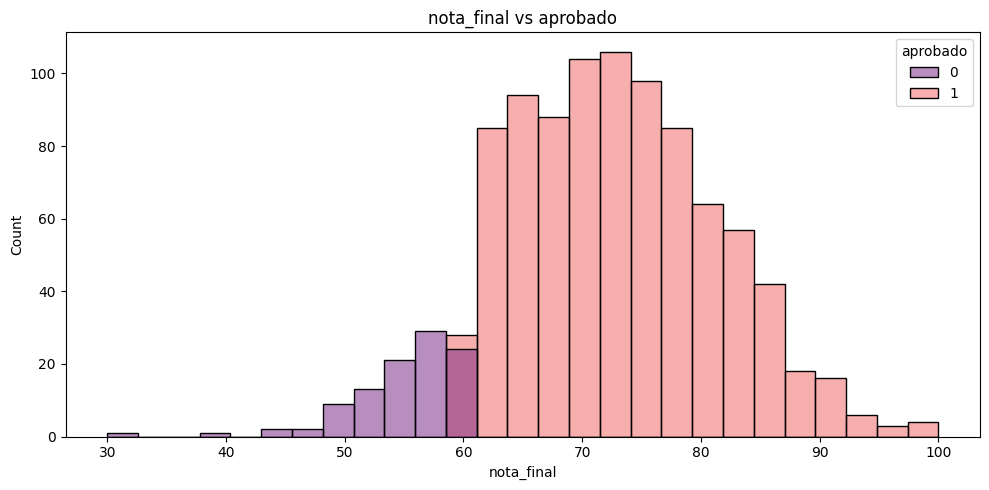

In [36]:
# Definir variable objetivo
tv='aprobado'

for col in df.columns:
    # Saltar la variable objetivo
    if col==tv:
        continue

    plt.figure(figsize=(10, 5))

    if col in num_cols:
        sns.histplot(x=df[col], hue= df[tv], data=df, palette='magma', legend=True)
    elif col in cat_cols:
        sns.countplot(x=df[col], hue= df[tv], data=df, palette='magma')

    plt.title(f'{col} vs {tv}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Análisis de inconsistencias

In [37]:
inconsistencias= []

# Regla 1: horas_estudio_semanal no puede ser mas de 80
mask = df['horas_estudio_semanal'] >= 50
for i in df.index[mask]:
    inconsistencias.append((i, 'horas_estudio_semanal <= 60'))

# Regla 2: nota_anterior y nota_final no puede ser menor de '0' ni mayor que '100'
mask = ((df['nota_anterior'] < 0) | (df['nota_anterior'] > 100) |
        (df['nota_final'] < 0) | (df['nota_final'] > 100) | (df['tasa_asistencia'] < 0) | (df['tasa_asistencia'] > 100))
for i in df.index[mask]:
    inconsistencias.append((i, 'nota_anterior o nota_final o tasa_asistencia fuera de rango'))

# Regla 3: horas_sueno no puede ser menos de '0' mas de '24'
mask = (df['horas_sueno'] <= 0) | (df['horas_sueno'] >= 24)
for i in df.index[mask]:
    inconsistencias.append((i, 'horas_sueno no puede ser menos de 0 ni mayor 24'))

# Regla 4: edad no puede ser menos de '18' mas de '100'
mask = (df['edad'] < 18) | (df['edad'] > 100)
for i in df.index[mask]:
    inconsistencias.append((i, 'edad no puede ser menos de 18 ni mayor 100'))

# Crear el DataFrame de inconsistencias
df_inconsistencias = pd.DataFrame(inconsistencias, columns=['Index','Inconsistencias'])

# Obtener índices únicos de las inconsistencias
inconsistencias_indices = df_inconsistencias['Index'].unique()

# Filtrar el DataFrame original
df_inconsis_rows = df.loc[inconsistencias_indices]

In [38]:
df_inconsistencias['Inconsistencias'].value_counts()

Series([], Name: count, dtype: int64)

# **Export fichero limpio**

In [39]:
# Exportamos el fichero después de su limpieza y análisis a csv
df.to_csv('../data/processed/dataset_estudiantes_clean.csv', sep=';', decimal='.', index=False) 